# Underwater Sound Analysis
## General imports

In [1]:
import os
import csv
import librosa
import soundfile as sf
from collections import Counter
import pandas as pd

## Audio Features

In [2]:
def extract_audio_features(audio_path):
    
    percorso_normalizzato = os.path.normpath(audio_path)
    elementi = percorso_normalizzato.split(os.sep)
    
    dataset = elementi[0]
    tipo_target = elementi[1]
    nome_target = elementi[2]
    nome_file_audio = elementi[-1]
    
    y, sr = librosa.load(audio_path, sr=None, mono=False)
    duration = librosa.get_duration(y=y, sr=sr)
    channels = 'Mono' if y.ndim == 1 else 'Stereo'
    
    return {'Root': tipo_target, 'Type': nome_target, 'Name': nome_file_audio, 'Durata(s)': duration, 'Canali': channels, 'Frequenza(Hz)': sr}


def scrivi_csv(audio_features, csv_file):
    if not audio_features:
        return  # Se la lista è vuota, non fare nulla

    # Ottieni le chiavi dal primo dizionario per usarle come intestazioni
    keys = audio_features[0].keys()

    with open(csv_file, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=keys)
        
        # Scrivi l'intestazione
        writer.writeheader()
        
        # Scrivi le caratteristiche
        for features in audio_features:
            writer.writerow(features)

# Lista per memorizzare i percorsi dei file audio
audio_files = []

# Scorrere ricorsivamente le cartelle nel dataset
for root, dirs, files in os.walk('dataset_1/Target/Acoustic Harassment Devices'):
    for file in files:
        if file.endswith(('.wav','.mp3')):
           audio_files.append(os.path.join(root, file))
audio_features = []

for file in audio_files:

    feature1 = extract_audio_features(file)
    audio_features.append(feature1)
    
#scrittura nel file csv
csv_file = 'Features.csv'
scrivi_csv(audio_features, csv_file)

# Leggi il file CSV con una codifica diversa
df = pd.read_csv('Features.csv', encoding='cp1252')
pd.set_option('display.max_rows', None)
df['Duplicate'] = df.duplicated(keep=False)
# Mostra il dataframe
display(df)

,Root,Type,Name,Durata(s),Canali,Frequenza(Hz),Duplicate
0,Target,Cargo,20171104-1_1.wav,457.000000,Mono,32000,False
1,Target,Cargo,20171104a-2_2.wav,440.000000,Mono,32000,False
2,Target,Cargo,20171105a-3_3.wav,297.000000,Mono,32000,False
3,Target,Cargo,20171106-4_4.wav,328.000000,Mono,32000,False
4,Target,Cargo,20171107-5_5.wav,208.000000,Mono,32000,False
5,Target,Cargo,20171107b-6_6.wav,487.000000,Mono,32000,False
6,Target,Cargo,20171110-7_7.wav,534.000000,Mono,32000,False
7,Target,Cargo,20171111-8_8.wav,279.000000,Mono,32000,False
8,Target,Cargo,20171111e-9_9.wav,300.000000,Mono,32000,False
9,Target,Cargo,20171111f-10_10.wav,291.000000,Mono,32000,False


## Printing equals audio files into Dataset

In [3]:
###########
file_names = [os.path.basename(file) for file in audio_files]

file_counts = Counter(file_names)
duplicates_info = {}
# Creare un dizionario per mantenere traccia del percorso del file originale
original_paths = {}

for file_path in audio_files:
    file_name = os.path.basename(file_path)
    if file_counts[file_name] > 1:
        if file_name not in duplicates_info:
            duplicates_info[file_name] = {
                "count": file_counts[file_name],
                "paths": [file_path]
            }
            # Memorizza il percorso del file originale
            original_paths[file_name] = file_path
        else:
            duplicates_info[file_name]["count"] += 1
            duplicates_info[file_name]["paths"].append(file_path)

# Stampare informazioni sui file duplicati
total_duplicate_count = sum(info["count"] for info in duplicates_info.values())
print(f"Numero totale di file audio duplicati: {total_duplicate_count/3}")

for file_name, info in duplicates_info.items():
    print(f"Nome del file duplicato: {file_name}")
    print(f"Percorsi duplicati ({info['count']-1}):")
    for path in info["paths"]:
        print(path)
    print(f"Percorso del file originale: {original_paths[file_name]}")
    print()

Numero totale di file audio duplicati: 0.0


## Calculate the class distribution

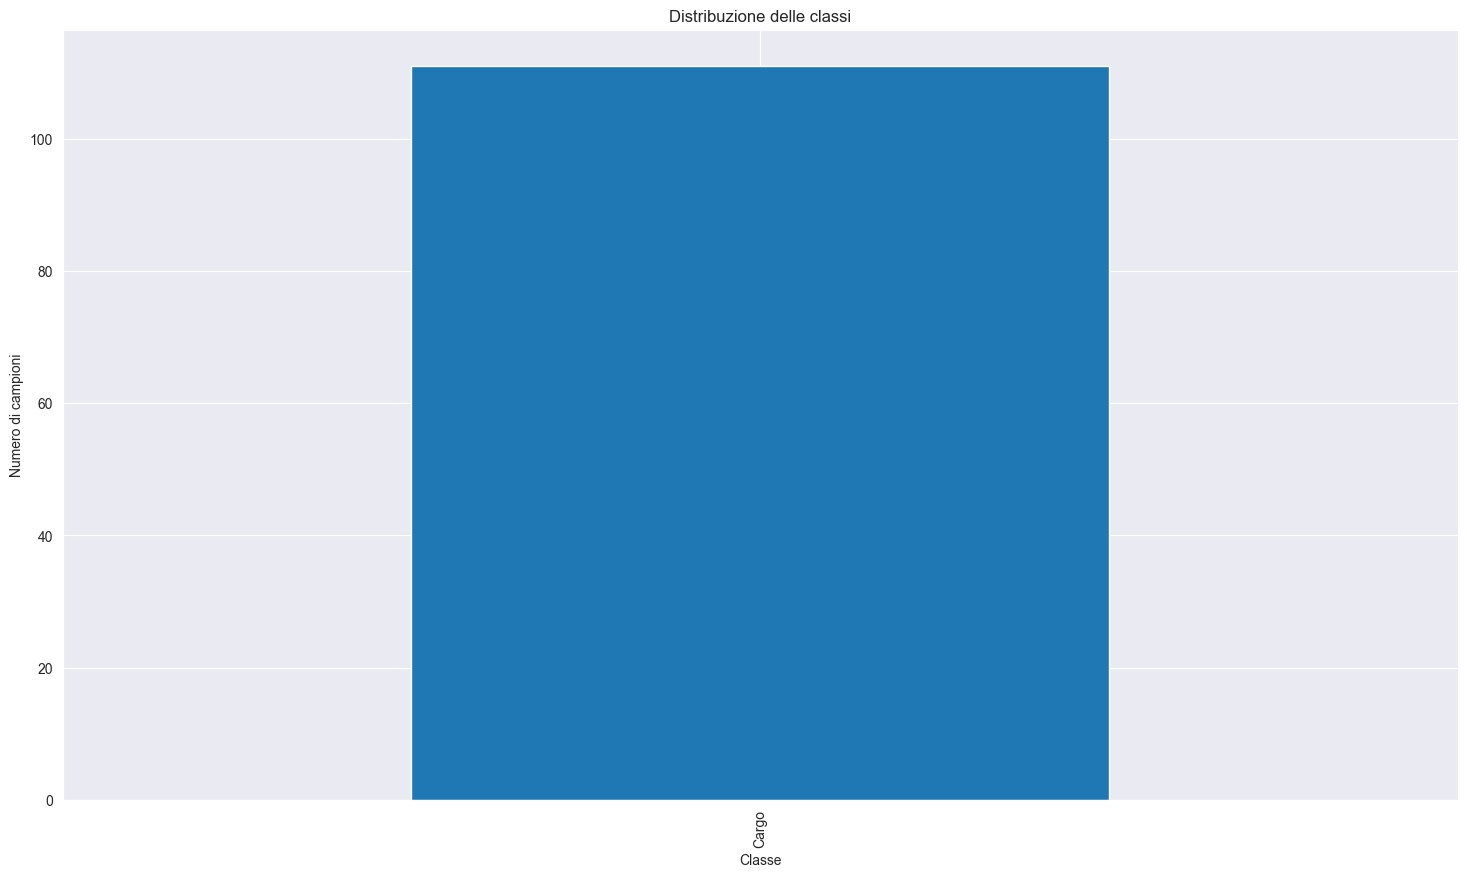

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Esempio di grafico a barre delle classi nel dataset
plt.figure(figsize=(18, 10))
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribuzione delle classi')
plt.xlabel('Classe')
plt.ylabel('Numero di campioni')
plt.show()

## Audio Duration Distribution

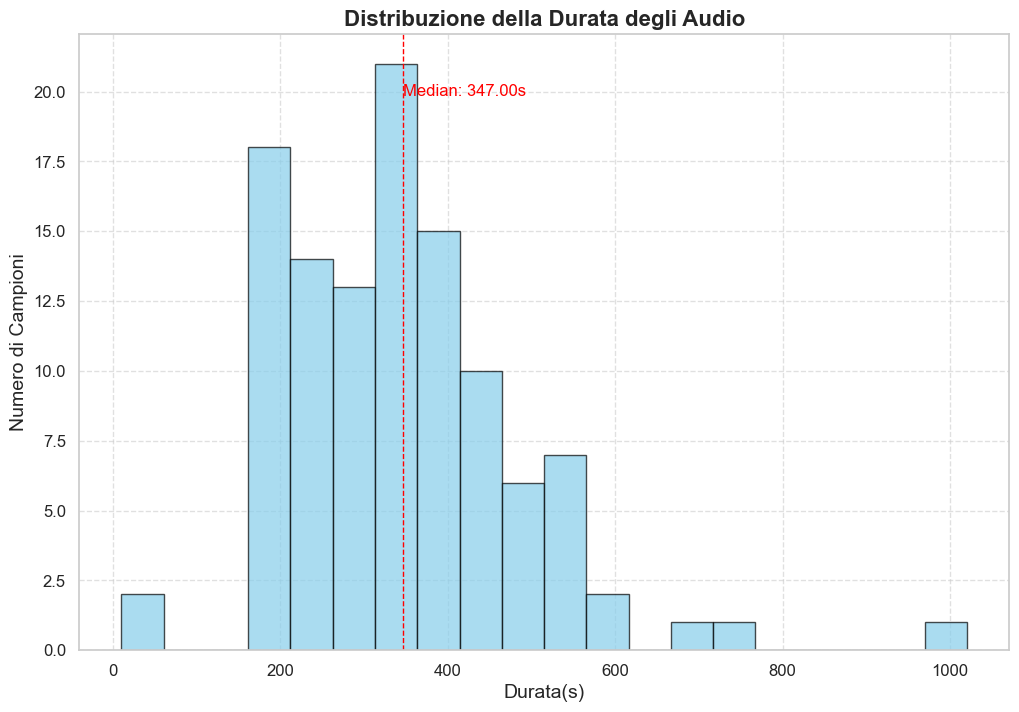

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

# Lista delle durate
durations = [feat['Durata(s)'] for feat in audio_features]

plt.figure(figsize=(12, 8))
plt.hist(durations, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Durata degli Audio', fontsize=16, weight='bold')
plt.xlabel('Durata(s)', fontsize=14)
plt.ylabel('Numero di Campioni', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiunta annotazioni
median_duration = np.median(durations)
plt.axvline(median_duration, color='red', linestyle='dashed', linewidth=1)
plt.text(median_duration, plt.ylim()[1] * 0.9, f'Median: {median_duration:.2f}s', color='red', fontsize=12)

# Aggiungi griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Visualizza il grafico
plt.show()


## Audio frequencies distribution
### It is used to understand at what frequency to change

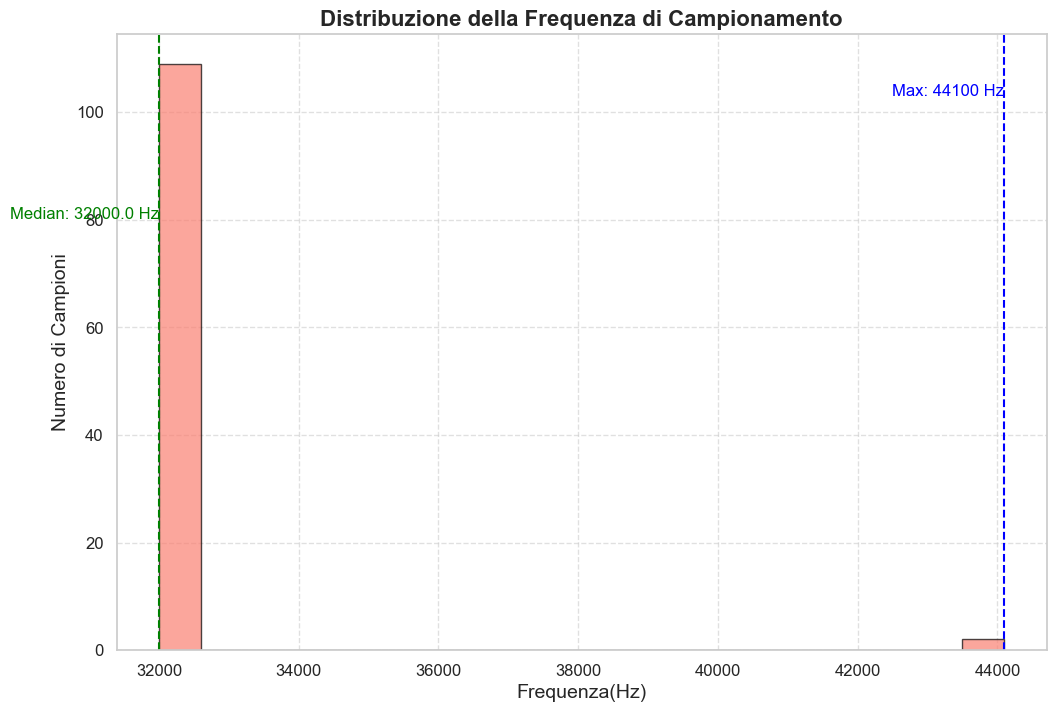

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate

# Imposta il tema di Seaborn per migliorare l'estetica
sns.set_theme(style="whitegrid")

# Frequenze di campionamento (assumendo che audio_features sia definito)
frequencies = [feat['Frequenza(Hz)'] for feat in audio_features]

# Creazione del grafico della distribuzione della frequenza di campionamento
plt.figure(figsize=(12, 8))  # Dimensioni maggiori per una migliore leggibilità
plt.hist(frequencies, bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della Frequenza di Campionamento', fontsize=16, weight='bold')
plt.xlabel('Frequenza(Hz)', fontsize=14)
plt.ylabel('Numero di Campioni', fontsize=14)

# Migliora le etichette degli assi
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungi annotazioni per la frequenza massima e la mediana
freq_max = max(frequencies)
median_freq = np.median(frequencies)
plt.axvline(freq_max, color='blue', linestyle='dashed', linewidth=1.5)
plt.axvline(median_freq, color='green', linestyle='dashed', linewidth=1.5)
plt.text(freq_max, plt.ylim()[1] * 0.9, f'Max: {freq_max} Hz', color='blue', fontsize=12, ha='right')
plt.text(median_freq, plt.ylim()[1] * 0.7, f'Median: {median_freq} Hz', color='green', fontsize=12, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

hist, bins = np.histogram(frequencies, bins=20)





### La mediana è il valore centrale che separa la metà superiore dei dati dalla metà inferiore. Essa non è influenzata dai valori anomali, come la media, e fornisce una misura più rappresentativa della frequenza di campionamento tipica.

In [7]:
tabella_dati = []
for i in range(len(hist)):
    tabella_dati.append((f"{bins[i]:.2f} - {bins[i+1]:.2f} Hz", hist[i]))
# Stampa della tabella
print(tabulate(tabella_dati, headers=["Intervallo di frequenza", "Numero di campioni"], tablefmt="pretty"))

+-------------------------+--------------------+
| Intervallo di frequenza | Numero di campioni |
+-------------------------+--------------------+
| 32000.00 - 32605.00 Hz  |        109         |
| 32605.00 - 33210.00 Hz  |         0          |
| 33210.00 - 33815.00 Hz  |         0          |
| 33815.00 - 34420.00 Hz  |         0          |
| 34420.00 - 35025.00 Hz  |         0          |
| 35025.00 - 35630.00 Hz  |         0          |
| 35630.00 - 36235.00 Hz  |         0          |
| 36235.00 - 36840.00 Hz  |         0          |
| 36840.00 - 37445.00 Hz  |         0          |
| 37445.00 - 38050.00 Hz  |         0          |
| 38050.00 - 38655.00 Hz  |         0          |
| 38655.00 - 39260.00 Hz  |         0          |
| 39260.00 - 39865.00 Hz  |         0          |
| 39865.00 - 40470.00 Hz  |         0          |
| 40470.00 - 41075.00 Hz  |         0          |
| 41075.00 - 41680.00 Hz  |         0          |
| 41680.00 - 42285.00 Hz  |         0          |
| 42285.00 - 42890.0

qui spieghiamo perché scegliamo di campionare a determinati Hz

In [8]:
statistiche_frequenze = [
    ("Frequenza massima", freq_max),
    ("Mediana delle frequenze", median_freq)
]

print(tabulate(statistiche_frequenze, headers=["Statistiche", "Valore (Hz)"], tablefmt="pretty"))

+-------------------------+-------------+
|       Statistiche       | Valore (Hz) |
+-------------------------+-------------+
|    Frequenza massima    |    44100    |
| Mediana delle frequenze |   32000.0   |
+-------------------------+-------------+


## It is used to see the paths of the audios that we are going to cut

In [9]:
def estrai_path_e_conta_frequenze(audio_features, frequenza_minima):
    # Filtra i file audio per la frequenza di campionamento minima specificata
    # paths = [feat['Audio'] for feat in audio_features if feat['Frequenza(Hz)'] >= frequenza_minima]
    paths = [
        f"Dataset/{feat['Root']}/{feat['Type']}/{feat['Name']}" 
        for feat in audio_features 
        if feat['Frequenza(Hz)'] >= frequenza_minima
    ]
    total_frequencies = len(paths)
    return paths, total_frequencies

# Frequenza minima desiderata (Hz)
frequenza_minima = 200001

# Estrazione dei path e conteggio delle frequenze per la frequenza minima specificata
paths, total_frequencies = estrai_path_e_conta_frequenze(audio_features, frequenza_minima)

# Stampa dei percorsi estratti
print(f"Percorsi dei file audio con frequenza di campionamento ≥ {frequenza_minima} Hz:")
for path in paths:
    print(path)

# Stampa del numero totale di frequenze trovate
print(f"\nNumero totale di frequenze trovate: {total_frequencies}")

Percorsi dei file audio con frequenza di campionamento ≥ 200001 Hz:

Numero totale di frequenze trovate: 0


qui evidenziamo quali audio superano una determinata soglia

## Mono/Stereo counting

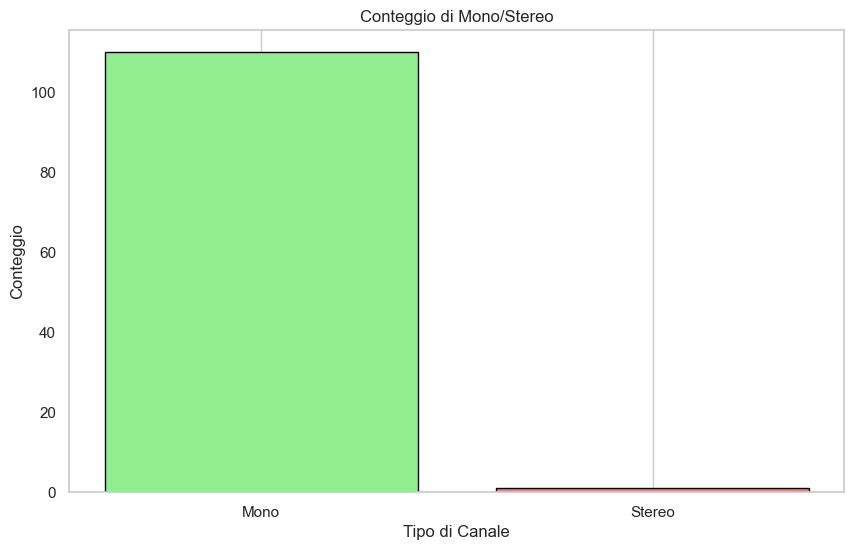

In [10]:
channels = [feat['Canali'] for feat in audio_features]

# Grafico del conteggio di mono/stereo
plt.figure(figsize=(10, 6))
plt.bar(['Mono', 'Stereo'], [channels.count('Mono'), channels.count('Stereo')], color=['lightgreen', 'lightcoral'], edgecolor=['black','black'])
plt.title('Conteggio di Mono/Stereo')
plt.xlabel('Tipo di Canale')
plt.ylabel('Conteggio')
plt.grid(axis='y')
plt.show()

## Depth Bit Counts

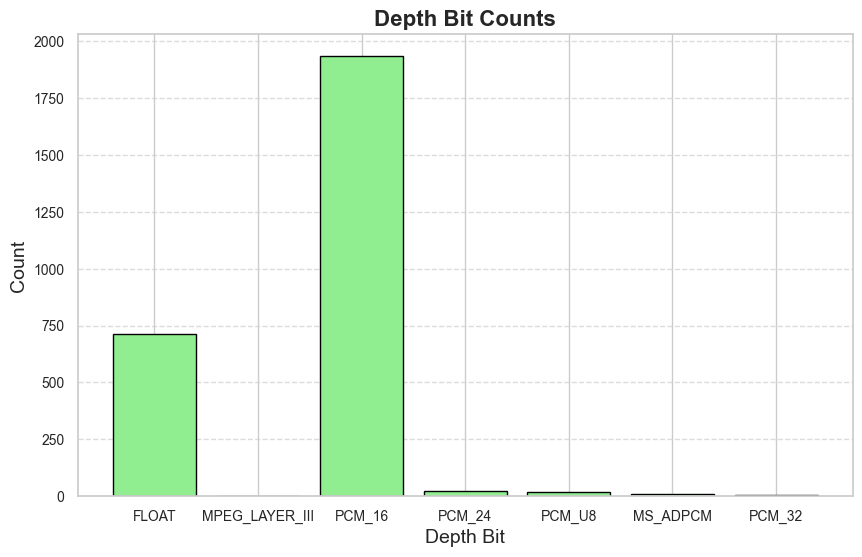

In [11]:
for root, dirs, files in os.walk('Dataset'):
    for file in files:
        if file.endswith(('.wav')):
           audio_files.append(os.path.join(root, file))
# Creare un dizionario per tenere traccia del conteggio di ciascun valore
depth_bit_counts = {}

for file in audio_files:
    audio = sf.SoundFile(file)
    depth_bit = audio.subtype
    
    # Aggiungere il valore al dizionario o incrementare il conteggio se già presente
    if depth_bit in depth_bit_counts:
        depth_bit_counts[depth_bit] += 1
    else:
        depth_bit_counts[depth_bit] = 1

# Estrai i dati per il grafico
depth_bits = list(depth_bit_counts.keys())
counts = list(depth_bit_counts.values())

# Creare il grafico a barre con dimensioni specificate
plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura a 12x8 pollici
plt.bar(depth_bits, counts, color='lightgreen', edgecolor='black')
plt.xlabel('Depth Bit', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Depth Bit Counts', fontsize=16, weight='bold')

# Migliora le etichette degli assi
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Aggiungi una griglia per migliorare la leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra il grafico
plt.show()

Durante l'analisi del dataset abbiamo trovato file di tipo mp3 e wav. Il bit depth è un concetto applicabile solamente ai file wav mentre i file mp3 vengono compressi e di conseguenza hanno il bitrate. Il bitrate è l'unità di misura che quantifica la quantità di audio compressi al secondo, non utili alle analisi di nostro interesse.
 

In [12]:
import numpy as np
import librosa
import soundfile as sf

def normalize_audio(input_file, output_file):
    # Carica il file audio
    audio_data, sample_rate = librosa.load(input_file, sr=None)
    
    # Trova il valore massimo assoluto nel segnale audio
    max_val = np.max(np.abs(audio_data))
    
    # Normalizza il segnale tra 0 e 1
    # normalized_audio = audio_data / max_val
    normalized_audio = (audio_data / max_val + 1) / 2
    
    # Scrivi il file audio normalizzato
    sf.write(output_file, normalized_audio, sample_rate)

# Esempio di utilizzo
input_file = 'dataset_1/Target/Acoustic Harassment Devices/AHD_Airmar.wav'
output_file = 'NuovoDataset/normalized_audio.wav'
normalize_audio(input_file, output_file)


In [13]:
import numpy as np
import librosa

def check_normalization(file):
    # Carica il file audio
    audio_data, _ = librosa.load(file, sr=None)
    
    # Trova i valori massimo e minimo del segnale audio
    max_val = np.max(audio_data)
    min_val = np.min(audio_data)
    
    # Stampa i risultati
    print(f"Valore massimo del segnale: {max_val}")
    print(f"Valore minimo del segnale: {min_val}")
    
    # Controlla se il segnale è normalizzato
    if -1 <= min_val <= 1 and -1 <= max_val <= 1:
        print("L'audio è stato normalizzato correttamente tra -1 e 1.")
    elif 0 <= min_val <= 1 and 0 <= max_val <= 1:
        print("L'audio è stato normalizzato correttamente tra 0 e 1.")
    else:
        print("L'audio non è stato normalizzato correttamente.")

# Esempio di utilizzo
normalized_file = 'NuovoDataset/normalized_audio.wav'
#normalized_file = 'dataset_1/Target/Acoustic Harassment Devices/AHD_Airmar.wav'

check_normalization(normalized_file)

Valore massimo del segnale: 0.999969482421875
Valore minimo del segnale: 0.063262939453125
L'audio è stato normalizzato correttamente tra -1 e 1.


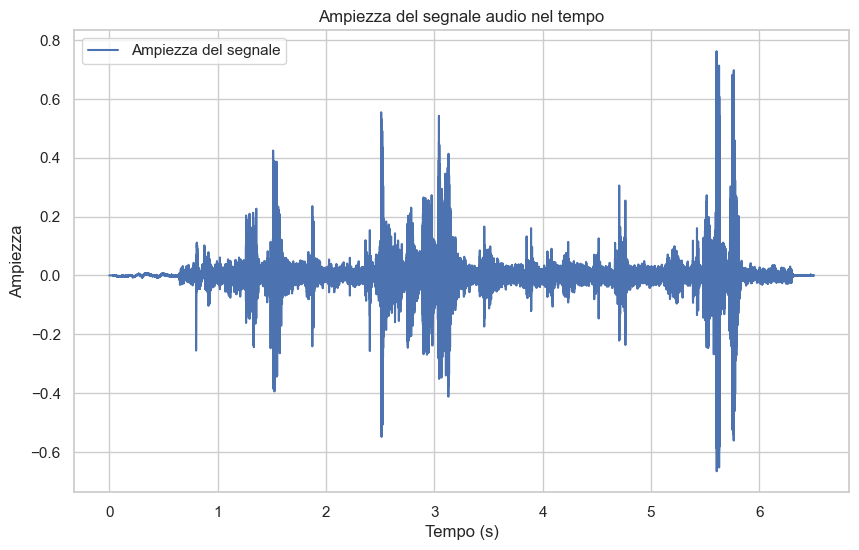

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_amplitude(file_path):
    # Carica l'audio con librosa
    y, sr = librosa.load(file_path, sr=None)
    
    # Genera i tempi corrispondenti ai campioni
    times = np.arange(len(y)) / sr
    
    # Crea il grafico dell'ampiezza
    plt.figure(figsize=(10, 6))
    plt.plot(times, y, label='Ampiezza del segnale')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ampiezza')
    plt.title('Ampiezza del segnale audio nel tempo')
    plt.grid(True)
    plt.legend()
    plt.show()

# Esempio di utilizzo

file_path = "dataset_1/Target/Acoustic Harassment Devices/AHD_Airmar.wav"
plot_amplitude(file_path)

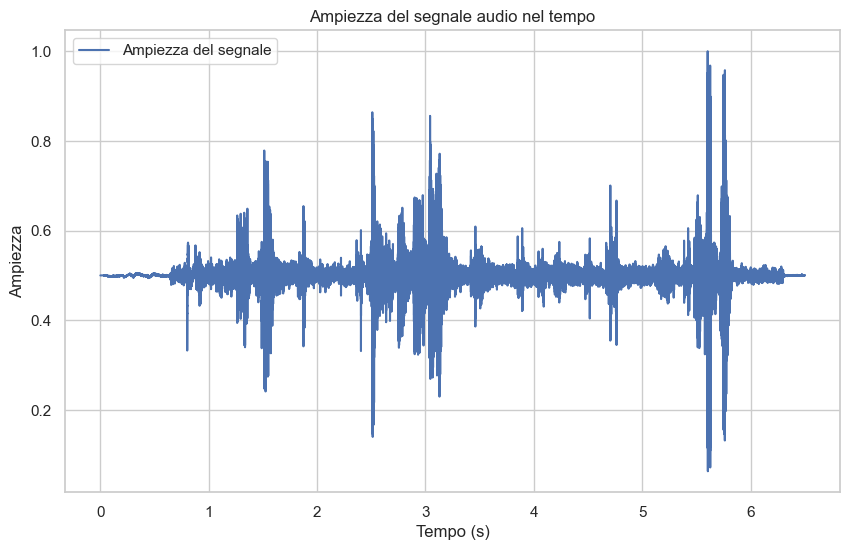

In [16]:

import librosa
import numpy as np
import matplotlib.pyplot as plt

def plot_amplitude(file_path):
    # Carica l'audio con librosa
    y, sr = librosa.load(file_path, sr=None)
    
    # Genera i tempi corrispondenti ai campioni
    times = np.arange(len(y)) / sr
    
    # Crea il grafico dell'ampiezza
    plt.figure(figsize=(10, 6))
    plt.plot(times, y, label='Ampiezza del segnale')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ampiezza')
    plt.title('Ampiezza del segnale audio nel tempo')
    plt.grid(True)
    plt.legend()
    plt.show()

# Esempio di utilizzo
file_path = "NuovoDataset/normalized_audio.wav"
plot_amplitude(file_path)
